In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
df = pd.read_csv(Path('Monarch_Watch_2020.csv'))
df.head()

,Tag Code,Date,City/Location,State/Province,ZIP/PC,Country,First Name,Notes
0,AABX630,10/22/2020,North Cape May,NJ,8204,USA,Mark,Beth Polvino's Garden
1,AABX693,9/30/2020,Sewell,NJ,8080,USA,Debbie,flying around and sucking up nectar form aster...
2,AAHL099,9/26/2020,Saint-Lambert,QC,J4p 2j4,CAN,Luce,"On a Flower, sidewalk of a commercial street"
3,AAHL209,10/10/2020,Quebec City,QC,G1S 3J3,CAN,Pierre,Was found in my backyard. Looked in good shape...
4,AAJM336,8/26/2020,Wilmington,NC,28403,USA,Franca,Landed on the Butterfly Bush in our front yard...


In [27]:
# adding a column for year
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Tag Code,Date,City/Location,State/Province,ZIP/PC,Country,First Name,Notes,year
0,AABX630,10/22/2020,North Cape May,NJ,8204,USA,Mark,Beth Polvino's Garden,2020
1,AABX693,9/30/2020,Sewell,NJ,8080,USA,Debbie,flying around and sucking up nectar form aster...,2020
2,AAHL099,9/26/2020,Saint-Lambert,QC,J4p 2j4,CAN,Luce,"On a Flower, sidewalk of a commercial street",2020
3,AAHL209,10/10/2020,Quebec City,QC,G1S 3J3,CAN,Pierre,Was found in my backyard. Looked in good shape...,2020
4,AAJM336,8/26/2020,Wilmington,NC,28403,USA,Franca,Landed on the Butterfly Bush in our front yard...,2020


In [28]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Tag Code,Date,City/Location,State/Province,ZIP/PC,Country,First Name,Notes,year,month
0,AABX630,10/22/2020,North Cape May,NJ,8204,USA,Mark,Beth Polvino's Garden,2020,10
1,AABX693,9/30/2020,Sewell,NJ,8080,USA,Debbie,flying around and sucking up nectar form aster...,2020,9
2,AAHL099,9/26/2020,Saint-Lambert,QC,J4p 2j4,CAN,Luce,"On a Flower, sidewalk of a commercial street",2020,9
3,AAHL209,10/10/2020,Quebec City,QC,G1S 3J3,CAN,Pierre,Was found in my backyard. Looked in good shape...,2020,10
4,AAJM336,8/26/2020,Wilmington,NC,28403,USA,Franca,Landed on the Butterfly Bush in our front yard...,2020,8


In [30]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["month"]).count()
counts = counts.reset_index()
counts

,month,Tag Code,Date,City/Location,State/Province,ZIP/PC,Country,First Name,Notes,year
0,7,1,1,1,1,1,1,1,0,1
1,8,96,96,96,96,96,96,92,74,96
2,9,448,448,448,448,448,448,431,352,448
3,10,241,241,241,241,241,241,235,199,241
4,11,77,77,77,77,77,77,76,68,77
5,12,14,14,14,14,14,14,12,12,14


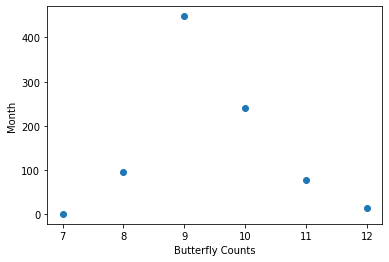

In [32]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
plt.scatter(counts.month, counts.Date)
plt.xlabel('Butterfly Counts')
plt.ylabel('Month')
plt.show()

In [40]:
# using reshape
X = counts.month.values.reshape(-1, 1)

In [41]:
# setting the y axis as the count of dates
y = counts.Date

In [42]:
# setting the model
model = LinearRegression()

In [43]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [44]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(6,)


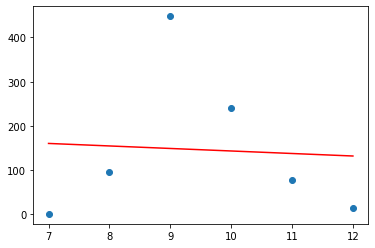

In [45]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()